# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [28]:
import numpy as np

# 1
prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

prezzoMedio = np.mean(prezzi)
print(f"Prezzo medio: {prezzoMedio:.2f}€")

# 2
libriSopraMedia = prezzi[prezzi > prezzoMedio]
print(f"Libri sopra la media: {libriSopraMedia}")

# 3
prezziScontati = np.where(prezzi > prezzoMedio, prezzi * 0.9, prezzi)
print(f"Prezzi con sconto: {prezziScontati}")

Prezzo medio: 18.98€
Libri sopra la media: [22.5  31.2  24.9  19.99 27.3 ]
Prezzi con sconto: [14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

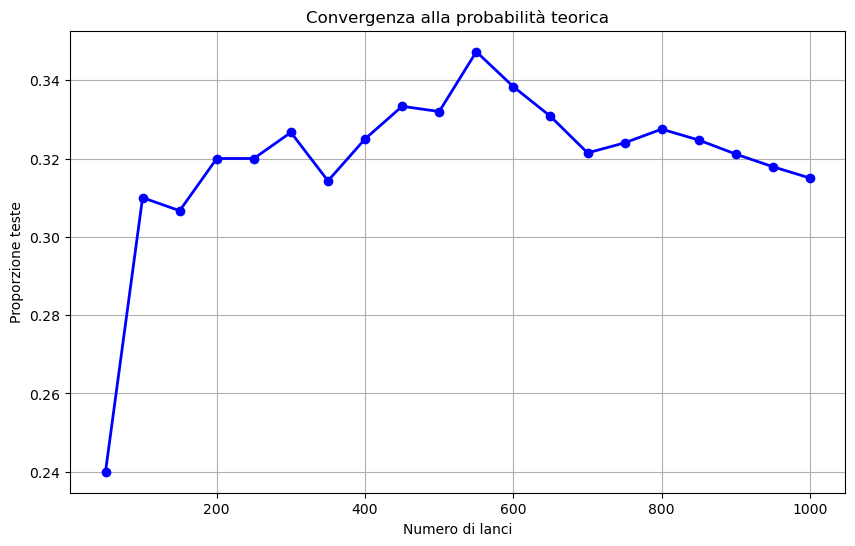

Proporzione finale teste: 0.315


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1
np.random.seed(42)
lanci = np.random.choice([0, 1], size=1000, p=[2/3, 1/3])
cumsumTeste = np.cumsum(lanci)

# 2
puntiControllo = np.arange(50, 1001, 50)
proporzioniTeste = cumsumTeste[puntiControllo - 1] / puntiControllo


# 3
plt.figure(figsize=(10, 6))
plt.plot(puntiControllo, proporzioniTeste, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Numero di lanci')
plt.ylabel('Proporzione teste')
plt.grid(True)
plt.title('Convergenza alla probabilità teorica')
plt.show()

print(f"Proporzione finale teste: {proporzioniTeste[-1]:.3f}")

## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [30]:
import numpy as np

def mat_normalizzata(matrice):
    media = np.mean(matrice)
    std = np.std(matrice)
    
    if std == 0:
        print("Deviazione standard è zero, impossibile normalizzare")
        return None
    
    matriceNorm = (matrice - media) / std
    return matriceNorm

# 1
np.random.seed(42)
matriceTest = np.random.normal(loc=5, scale=2, size=(6, 10))

print("Matrice originale:")
print(f"Media: {np.mean(matriceTest):.3f}")
print(f"Std: {np.std(matriceTest):.3f}")

# Normalizzazione
matriceNorm = mat_normalizzata(matriceTest)

print("\nMatrice normalizzata:")
print(f"Media: {np.mean(matriceNorm):.3f}")
print(f"Std: {np.std(matriceNorm):.3f}")

Matrice originale:
Media: 4.691
Std: 1.802

Matrice normalizzata:
Media: -0.000
Std: 1.000


## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


Libro con engagement score massimo:
Titolo: Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Engagement Score: 29.58

Libri con valutazione > 4.5: 129


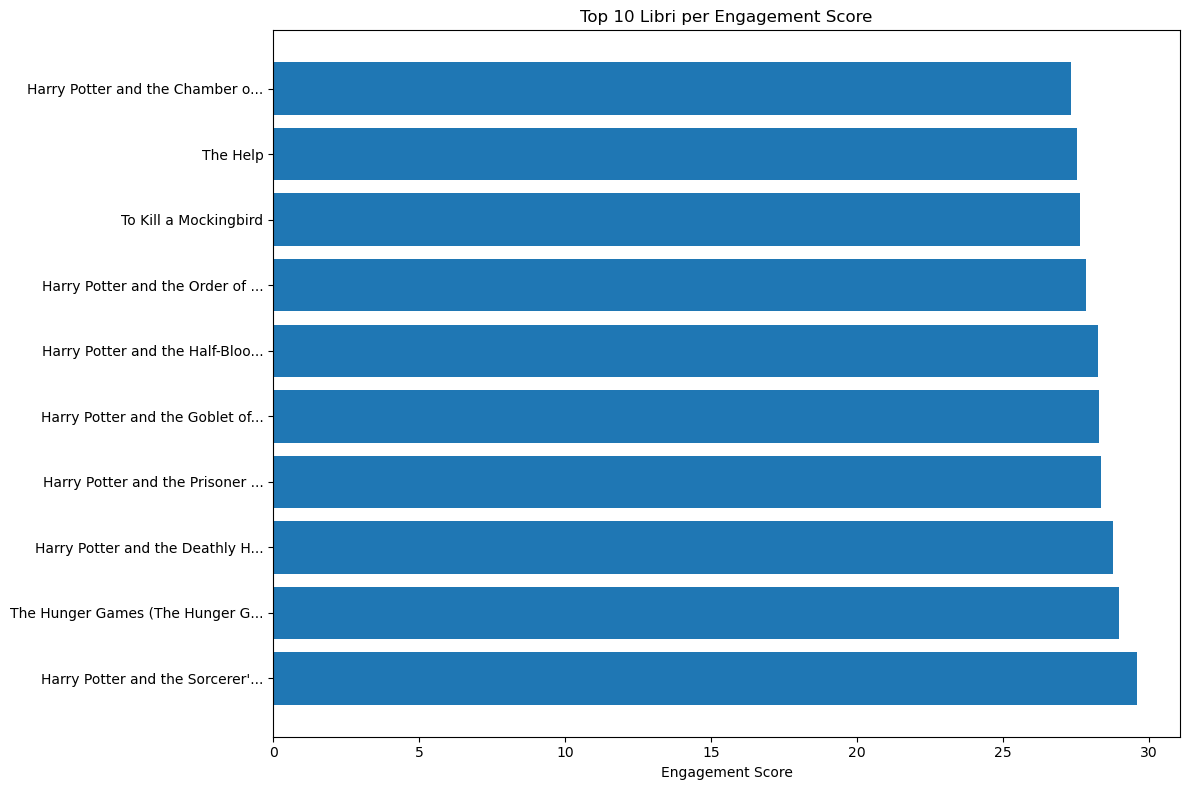

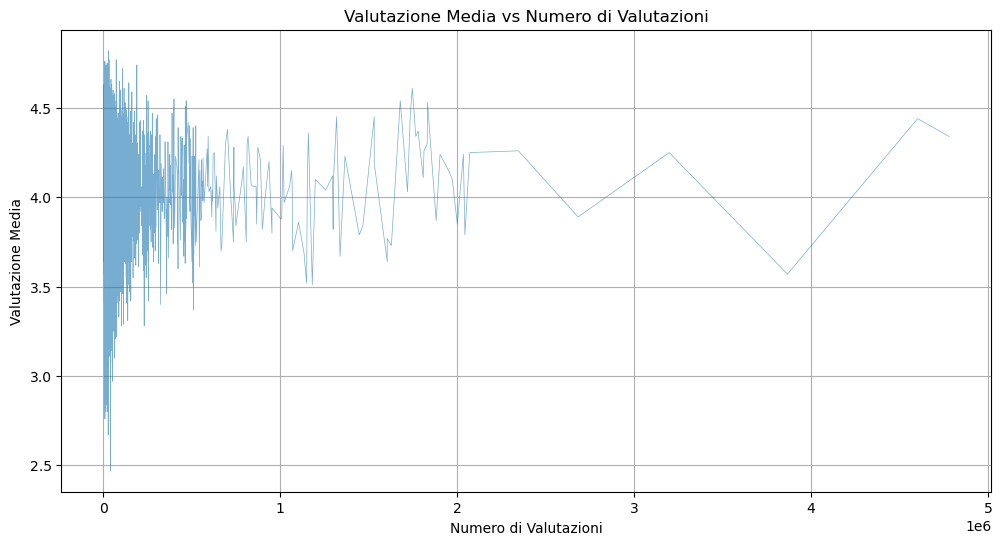

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
df = pd.read_csv('books.csv')
df['engagement_score'] = df['average_rating'] * np.log10(1 + df['ratings_count'])

# 2
libroMax = df.iloc[df['engagement_score'].argmax()]
print(f"Libro con engagement score massimo:")
print(f"Titolo: {libroMax['title']}")
print(f"Engagement Score: {libroMax['engagement_score']:.2f}")

# 3
maxRating = df[df['average_rating'] > 4.5]
print(f"\nLibri con valutazione > 4.5: {len(maxRating)}")

# 4
top10Engagement = df.nlargest(10, 'engagement_score')

plt.figure(figsize=(12, 8))
plt.barh(range(len(top10Engagement)), top10Engagement['engagement_score'])
plt.yticks(range(len(top10Engagement)), 
            [title[:30] + '...' if len(title) > 30 else title 
            for title in top10Engagement['title']])
plt.xlabel('Engagement Score')
plt.title('Top 10 Libri per Engagement Score')
plt.tight_layout()
plt.show()

# 5
booksSorted = df.sort_values('ratings_count')

plt.figure(figsize=(12, 6))
plt.plot(booksSorted['ratings_count'], booksSorted['average_rating'], alpha=0.6, linewidth=0.5)
plt.xlabel('Numero di Valutazioni')
plt.ylabel('Valutazione Media')
plt.title('Valutazione Media vs Numero di Valutazioni')
plt.grid(True)
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


Dimensioni dataset: 32561 righe, 15 colonne

Valori mancanti per colonna:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Età media per sesso:
sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

% persone con reddito >50K per sesso:
sex
Female    10.946059
Male      30.573658
Name: income, dtype: float64


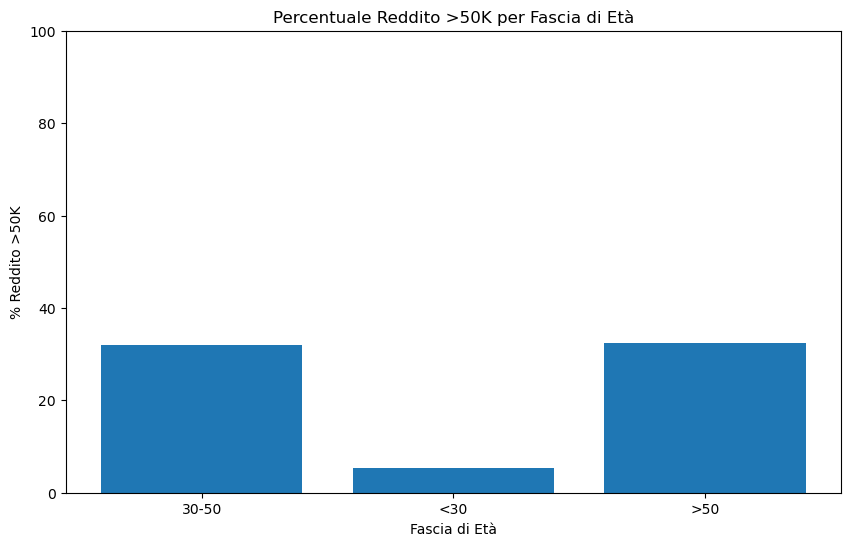

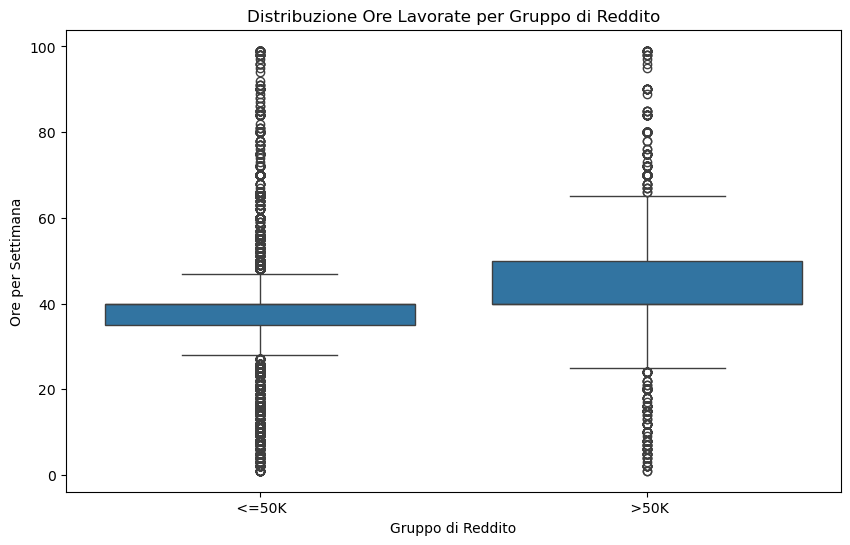

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult_con_titoli.csv')

# 1
print(f"Dimensioni dataset: {df.shape[0]} righe, {df.shape[1]} colonne")

# 2
print("\nValori mancanti per colonna:")
print(df.isnull().sum())

# 3
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)

# 4
eta = df.groupby('sex')['age'].mean()
print(f"\nEtà media per sesso:")
print(eta)

# 5
reddito = df.groupby('sex')['income'].apply(lambda x: (x == ' >50K').mean() * 100)
print(f"\n% persone con reddito >50K per sesso:")
print(reddito)

# 6
def categorizza_eta(eta):
    if eta < 30:
        return '<30'
    elif eta <= 50:
        return '30-50'
    else:
        return '>50'
df['age_group'] = df['age'].apply(categorizza_eta)

# 7
percentuale = df.groupby('age_group')['income'].apply(lambda x: (x == ' >50K').mean() * 100)

plt.figure(figsize=(10, 6))
plt.bar(percentuale.index, percentuale.values)
plt.xlabel('Fascia di Età')
plt.ylabel('% Reddito >50K')
plt.title('Percentuale Reddito >50K per Fascia di Età')
plt.ylim(0, 100)

plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Distribuzione Ore Lavorate per Gruppo di Reddito')
plt.xlabel('Gruppo di Reddito')
plt.ylabel('Ore per Settimana')
plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

I parametri stimati sono:
a = 2.49;
b = 1.21 .


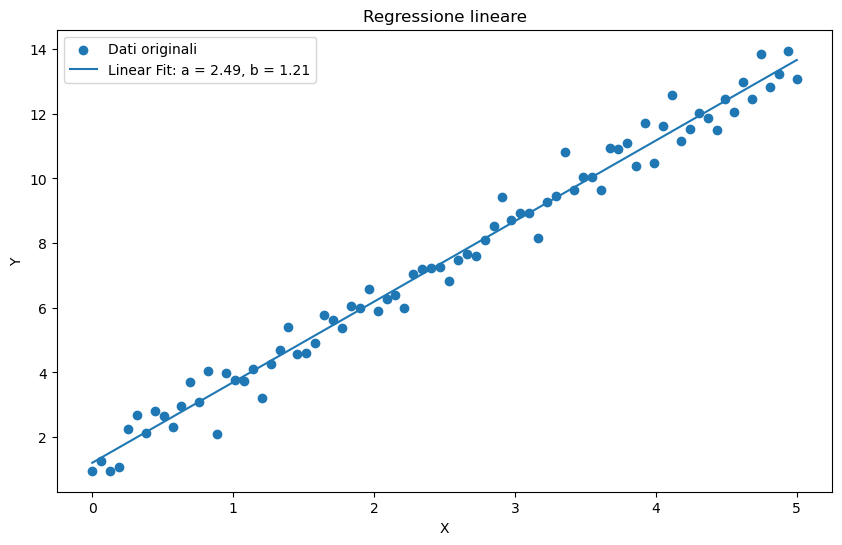

MAE: 0.37;
RMSE: 0.48


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

def funzione_lineare(x, a, b):
    return a * x + b

parametri, covarianza = curve_fit(funzione_lineare, x, y)
print(f"I parametri stimati sono:\na = {parametri[0]:.2f};\nb = {parametri[1]:.2f} .")

plt.figure(figsize=(10, 6))
plt.title('Regressione lineare')
plt.scatter(x, y, label='Dati originali')
plt.plot(x, funzione_lineare(x, *parametri), label=f'Linear Fit: a = {parametri[0]:.2f}, b = {parametri[1]:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

y_pred = funzione_lineare(x, parametri[0], parametri[1])
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE: {mae:.2f};\nRMSE: {rmse:.2f}")